In [4]:

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
driver = webdriver.Chrome()  # You need to have chromedriver installed and in your PATH

# URL of the website to scrape
url = 'https://ratings.fide.com/top_lists.phtml'

# Load the webpage
driver.get(url)
table = driver.find_element(By.XPATH, "//*[@id='div_output']/table/tbody")
rows = table.find_elements(By.TAG_NAME, "tr")
with open("sample.csv","w",newline="") as file:
    writer = csv.writer(file)
    for r in rows:
        data=r.find_elements(By.CSS_SELECTOR,"td,th")
        row_data=[]
        for d in data:
            row_data.append(d.text)
        writer.writerow(row_data)


driver.quit()


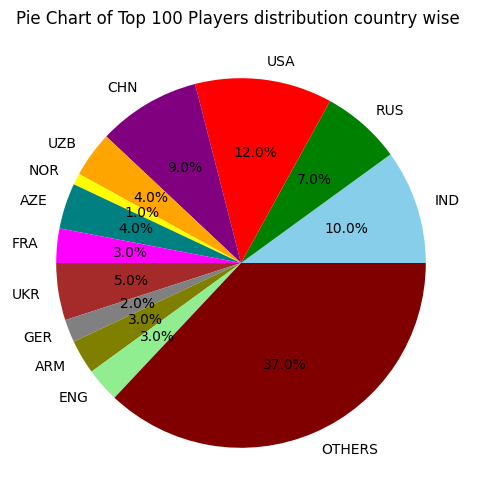

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sample.csv", header=None, names=["Name", "Country", "Ratings", "+-", "Birth year", "Avg rt"])

# Prepare data for the pie chart
value_counts = df["Country"].value_counts()
pie_data = [value_counts['IND'], value_counts['RUS'], value_counts['USA'], value_counts['CHN'],value_counts['UZB'],value_counts['NOR'],value_counts['AZE'],value_counts['FRA'],value_counts['UKR'],value_counts['GER'],value_counts['ARM'],value_counts['ENG'],value_counts.sum()-value_counts['IND']- value_counts['RUS']- value_counts['USA']- value_counts['CHN']-value_counts['UZB']-value_counts['ENG']-value_counts['ARM']-value_counts['NOR']-value_counts['AZE']-value_counts['FRA']-value_counts['UKR']-value_counts['GER']]

pie_labels = ['IND', 'RUS', 'USA', 'CHN','UZB','NOR','AZE','FRA','UKR','GER','ARM','ENG', 'OTHERS']

colors = ['skyblue', 'green', 'red', 'purple', 'orange', 'yellow',
          'teal', 'fuchsia', 'brown', 'gray', 'olive', 'lightgreen',
          'maroon', 'lime']

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%", colors=colors)  # Plot the pie chart
plt.title("Pie Chart of Top 100 Players distribution country wise ")
plt.show()


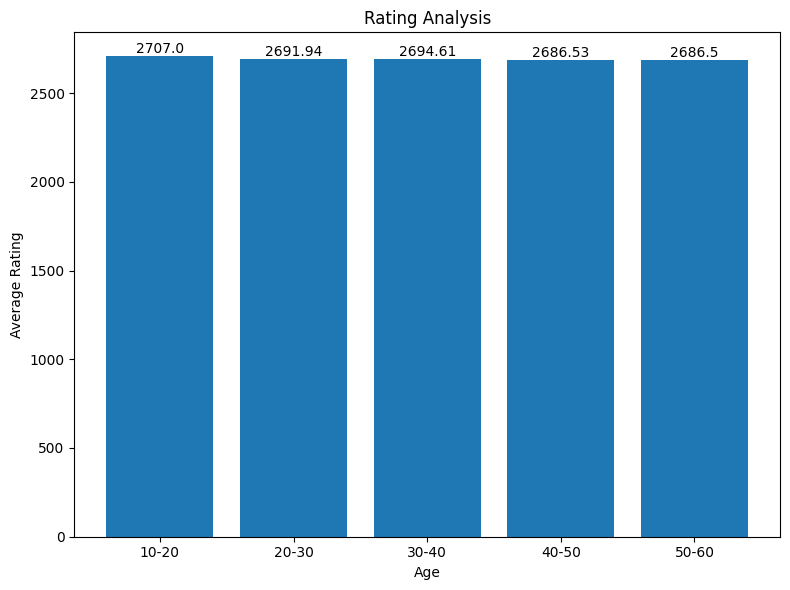

In [69]:
df["Age"] = 2024 - df["Birth year"]
avgrt = []
for i in range(1, 6):
    avgrt.append(df[(df["Age"] >= i*10) & (df["Age"] < (i+1)*10)]["Ratings"].mean())
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
bars = plt.bar(['10-20', '20-30', '30-40', '40-50', '50-60'], avgrt)  # Customize color as desired
for bar, value in zip(bars, avgrt):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, str(round(value, 2)), ha='center', va='bottom')  # Adjust positioning as needed

plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Rating Analysis')

plt.tight_layout()  # Adjust spacing to prevent overlapping elements (optional)
plt.show()
